In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_nba= pd.read_csv('../Project_10_tejas/all_seasons-3.csv')

data_nba_1=data_nba.sort_values(by='season').reset_index(drop=True)

data_nba_1.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,300,A.C. Green,DAL,33,205.74,102.058200,Oregon State,USA,1985,1,...,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
2,299,Jerome Allen,DEN,24,193.04,83.460928,Pennsylvania,USA,1995,2,...,3.0,1.3,2.0,-3.7,0.031,0.088,0.154,0.449,0.264,1996-97
3,298,Aaron McKie,DET,24,195.58,94.800728,Temple,USA,1994,1,...,5.2,2.7,1.9,5.2,0.031,0.129,0.147,0.524,0.163,1996-97
4,297,Aaron Williams,VAN,25,205.74,102.058200,Xavier,USA,Undrafted,Undrafted,...,6.2,4.3,0.5,-8.3,0.129,0.163,0.168,0.599,0.051,1996-97


In [3]:
data_nba_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  int64  
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

In [4]:
data_nba_1.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [5]:
avg_height = data_nba_1[data_nba_1['season'] == '2020-21']['player_height'].mean()
avg_weight = data_nba_1[data_nba_1['season'] == '2020-21']['player_weight'].mean()
avg_age = data_nba_1[data_nba_1['season'] == '2020-21']['age'].mean()

print("Average Height of NBA Player during the season 2020-21: ", avg_height)
print("Average Weight of NBA Player during the season 2020-21: ", avg_weight)
print("Average Age of NBA Player during the season 2020-21: ", avg_age)

Average Height of NBA Player during the season 2020-21:  198.91492592592607
Average Weight of NBA Player during the season 2020-21:  98.2404673333332
Average Age of NBA Player during the season 2020-21:  25.994444444444444


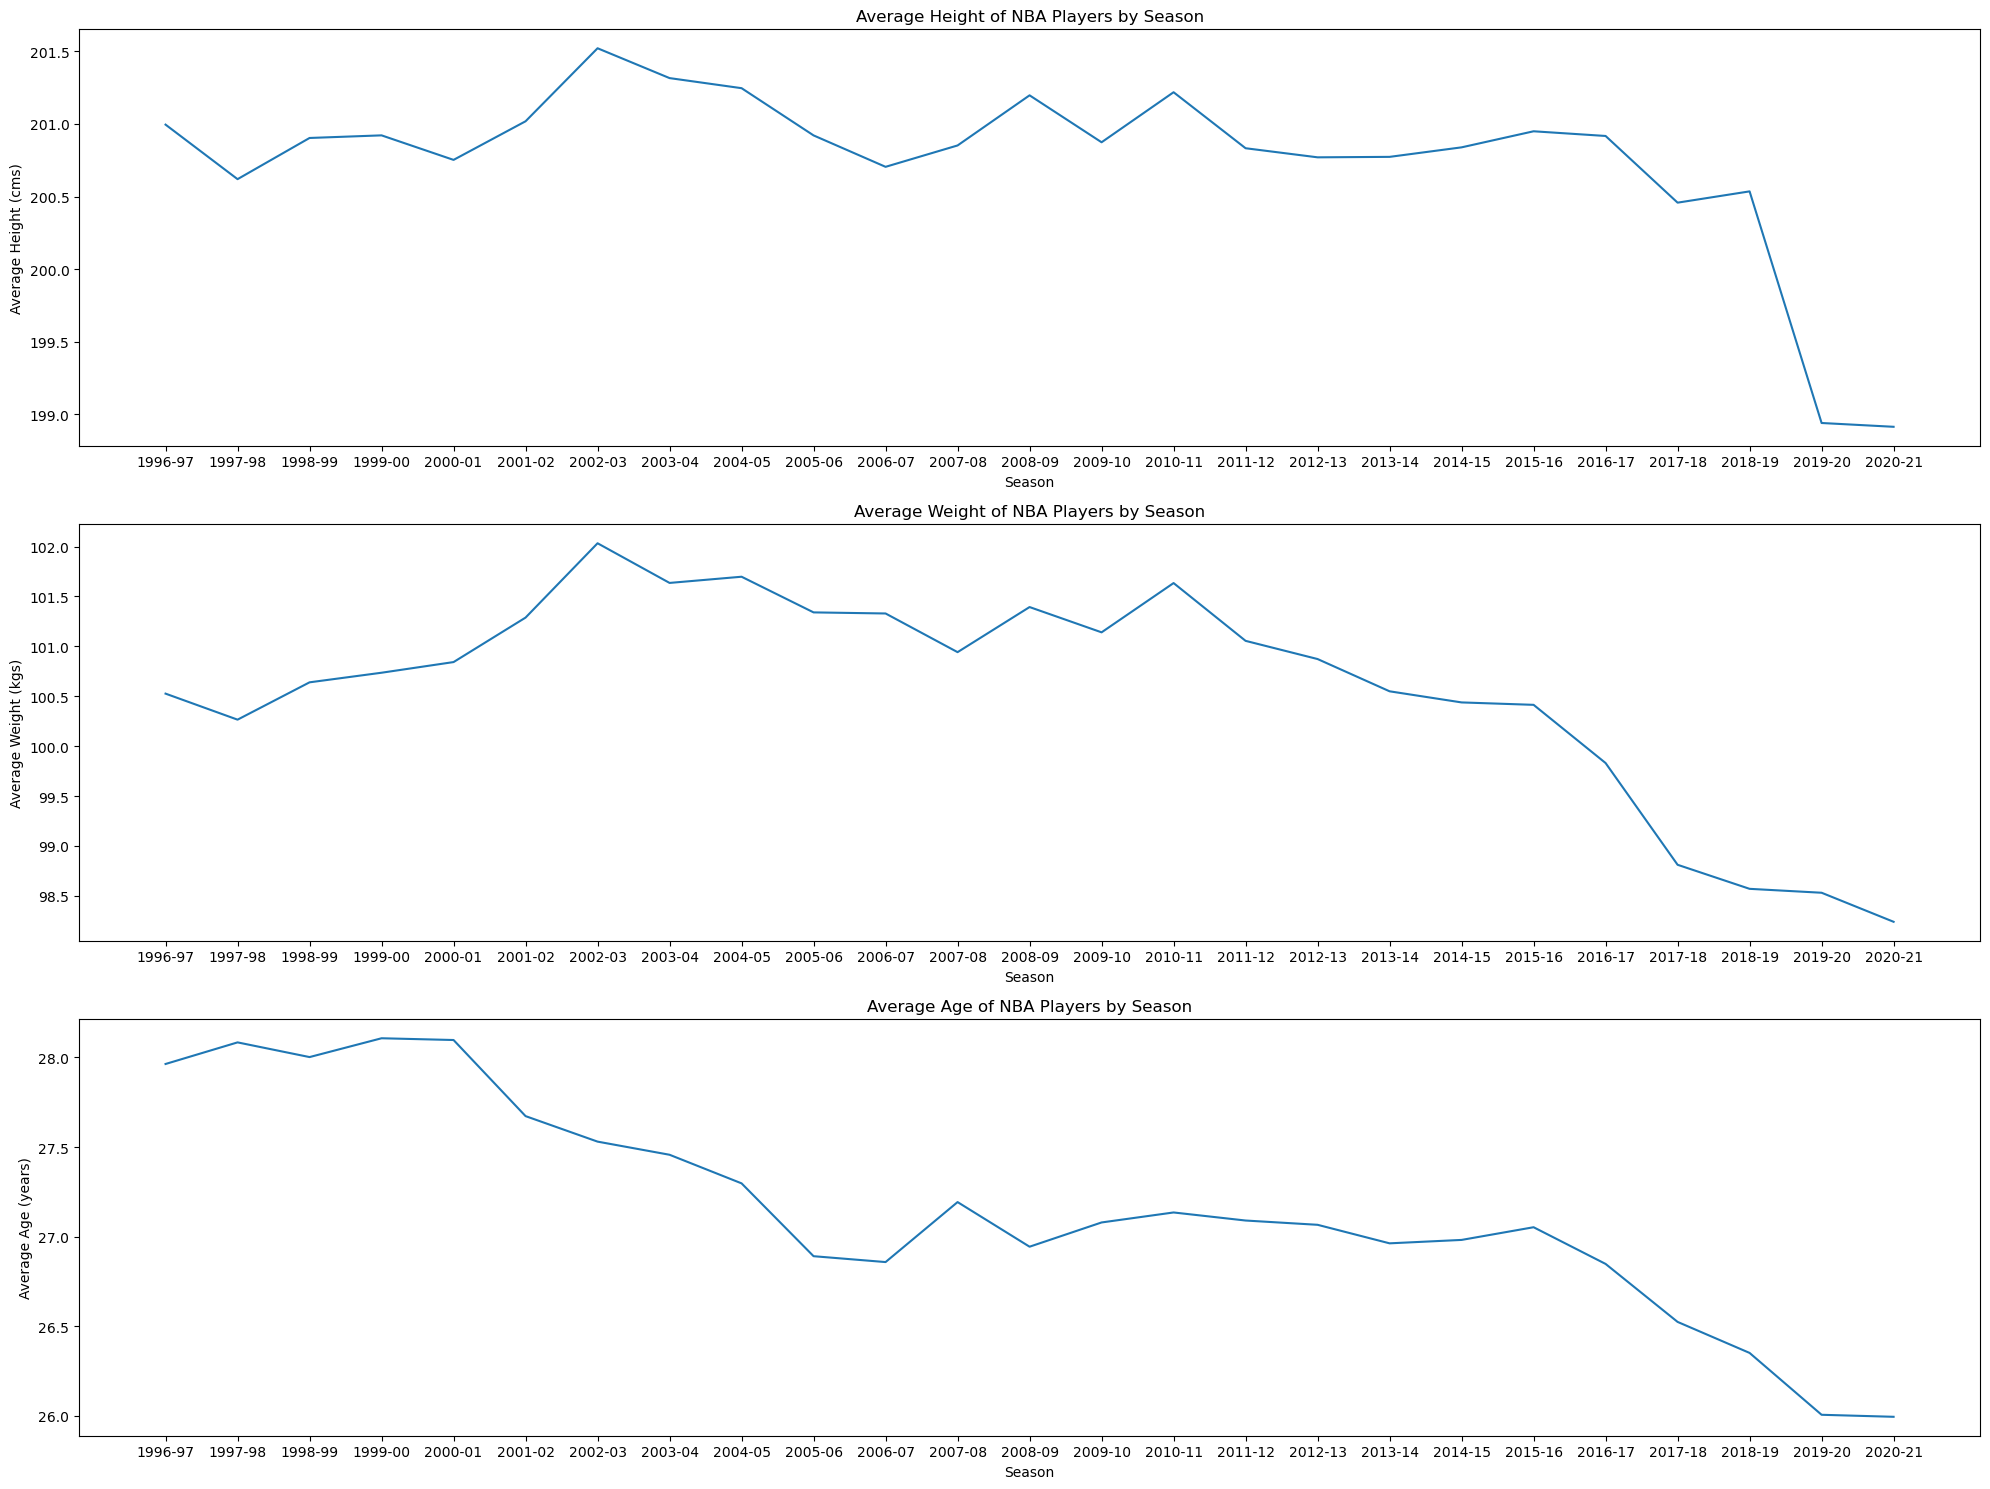

In [6]:
# Calculate the average height, weight, and age of players in each season
avg_height_by_season = data_nba_1.groupby('season')['player_height'].mean()
avg_weight_by_season = data_nba_1.groupby('season')['player_weight'].mean()
avg_age_by_season = data_nba_1.groupby('season')['age'].mean()

# Plot the average height, weight, and age of players in each season
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
axs[0].plot(avg_height_by_season.index, avg_height_by_season.values)
axs[0].set_title('Average Height of NBA Players by Season')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Average Height (cms)')


axs[1].plot(avg_weight_by_season.index, avg_weight_by_season.values)
axs[1].set_title('Average Weight of NBA Players by Season')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Average Weight (kgs)')


axs[2].plot(avg_age_by_season.index, avg_age_by_season.values)
axs[2].set_title('Average Age of NBA Players by Season')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Average Age (years)')
plt.savefig('../Project_10_tejas/plot_season_age.jpg')

plt.tight_layout()
plt.show()

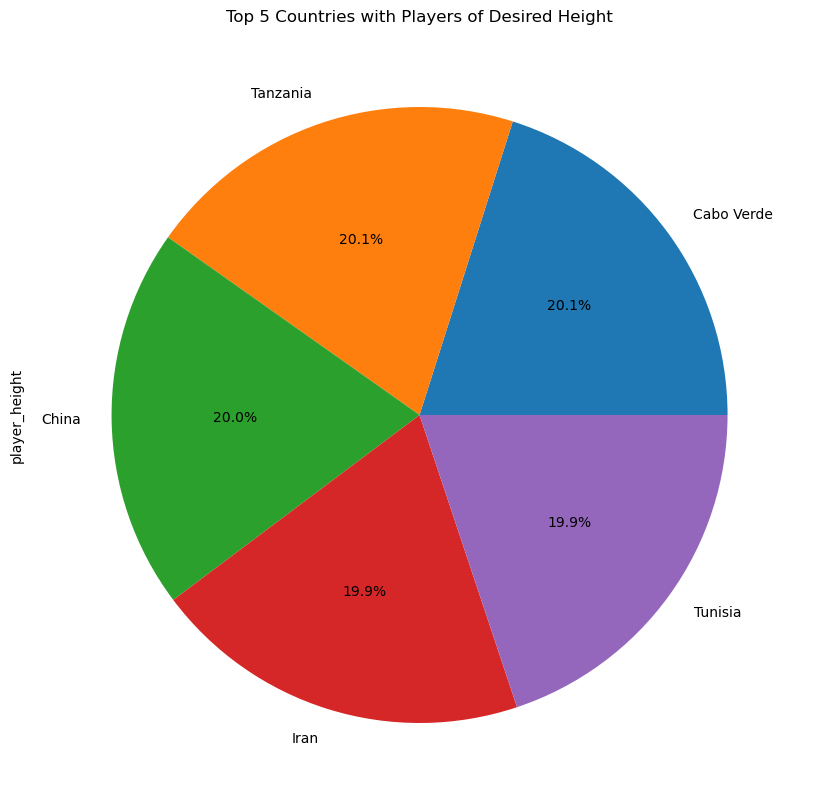

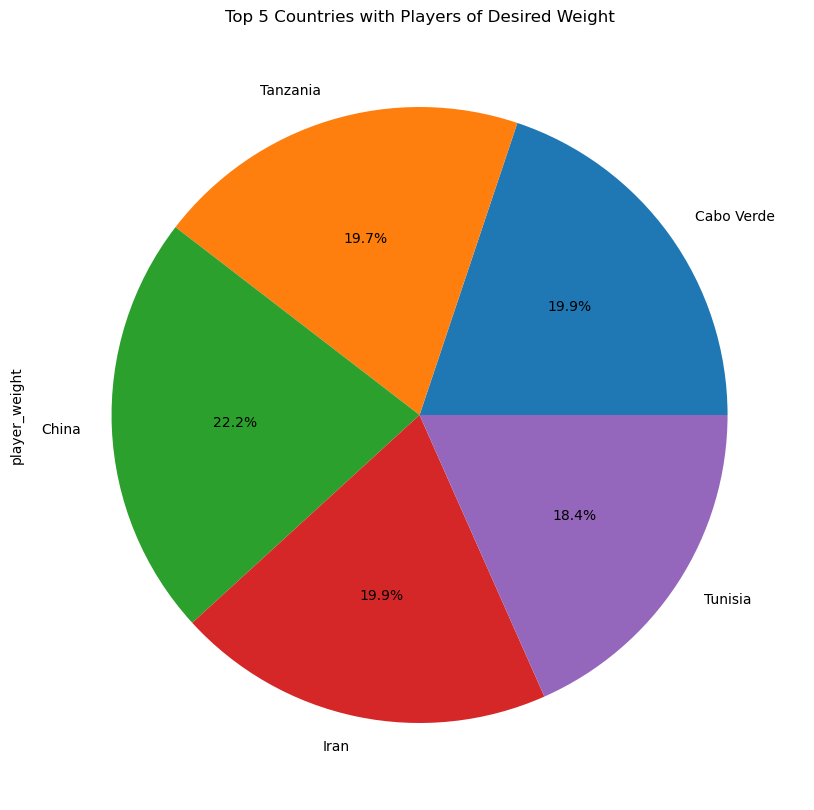

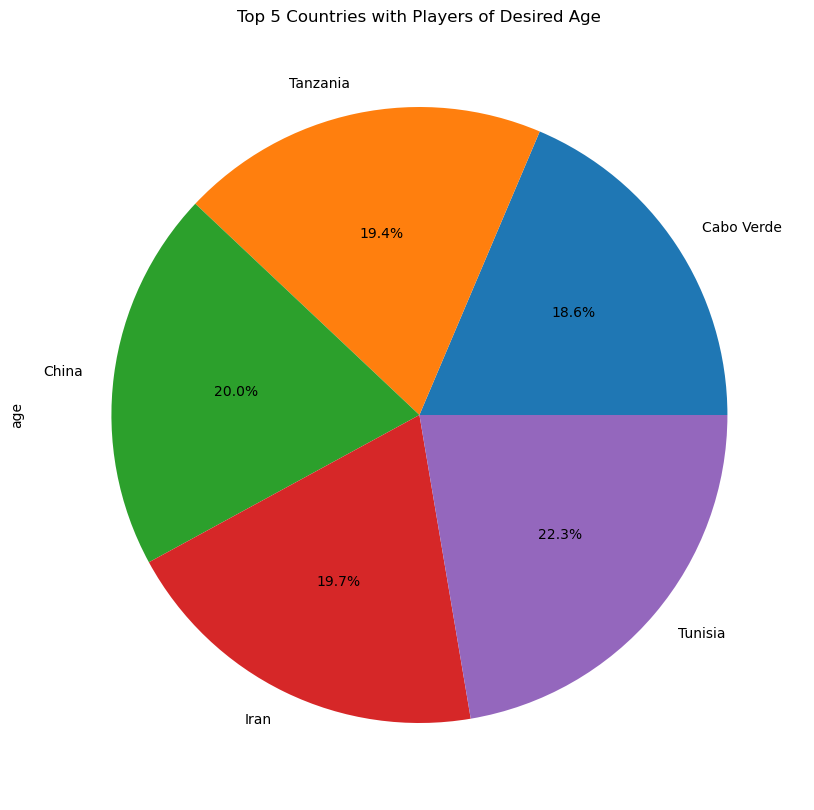

In [7]:
# filter the data to only include players with the desired characteristics
filtered_data = data_nba_1[(data_nba_1['player_height'] > 200) & (data_nba_1['player_weight'] > 98) & (data_nba_1['age'] >= 25) & (data_nba_1['age'] <= 30)]

# group the data by country
grouped_data = filtered_data.groupby('country')

# calculate the mean height, weight, and age for each country
grouped_data = grouped_data.mean()

# sort the data by height, weight, and age
grouped_data = grouped_data.sort_values(by=['player_height', 'player_weight', 'age'], ascending=False)

# select the top 5 countries for height
top_5_height_countries = grouped_data.head(5)

# plot the data for height as a pie chart
top_5_height_countries['player_height'].plot.pie(autopct='%1.1f%%', figsize=(10, 10))

# set the title of the plot
plt.title('Top 5 Countries with Players of Desired Height')

plt.savefig('../Project_10_tejas/Desired Height.jpg')

# show the plot
plt.show()

# select the top 5 countries for weight
top_5_weight_countries = grouped_data.head(5)

# plot the data for weight as a pie chart
top_5_weight_countries['player_weight'].plot.pie(autopct='%1.1f%%', figsize=(10, 10))

# set the title of the plot
plt.title('Top 5 Countries with Players of Desired Weight')

plt.savefig('../Project_10_tejas/Desired Weight.jpg')


# show the plot
plt.show()

# select the top 5 countries for age
top_5_age_countries = grouped_data.head(5)

# plot the data for age as a pie chart
top_5_age_countries['age'].plot.pie(autopct='%1.1f%%', figsize=(10, 10))

# set the title of the plot
plt.title('Top 5 Countries with Players of Desired Age')

plt.savefig('../Project_10_tejas/Desired Age.jpg')

# show the plot
plt.show()